<a href="https://colab.research.google.com/github/lsh4205/Infectious_Disease_Sim/blob/main/Infectious_Disease_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.1.Fixed points





> To find the fixed point of the system. We need to find when $Dx = 0$, with given $τ ≥ 0$ and $k > 0$.

\begin{align}
 -τ ⋅ S(t)⋅I(t) = 0
\end{align}

\begin{align}
τ ⋅ S(t) ⋅ I(t) - \frac{I(t)}{k} = 0
\end{align}

\begin{align}
\frac{I(t)}{k} = 0
\end{align}

> From the third equation, $I(t) = 0$, which can be replaced into the second equation. $τ ⋅ S(t) ⋅ I(t) - \frac{0}{k} = 0$. It means $S(t)$ can be any value in between $0$ to $1$. 

## 1.2. Implement a computer simulation.

> If the infection lasts $k$ days, then we might assume as an approximation that the rate of recovery is equal to the number infected divided by $k$.  Thus, on average, $1/k$ of the infected individuals recover each day.

> From textbook, the author let $τ$ be the proportion of encounters between an infected individual and a susceptible individual that transmit the infection.  Then the rate of new infections should increaseas any of the parameters $I$, $S$, or $τ$ increases, so we model this rate as $τ\cdot I(t)\cdot S(t)$.

> Let the initial conditions be $I(0) = 0.01$ (initial infected population
of 1%), $S(0) = 0.99$, and $R(0) = 0$.

> Run a simulation until $I(t) < 10^{−4}$, the “Stopping Condition” for this experiment. At what time t does this condition occur? Report your stopping time results to two digits after the decimal point.Create a plot that shows how $S(t)$, $I(t)$, and $R(t)$ vary in time. 

### 1.2.1. Code

In [3]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

# @param: Tau >= 0, how quickly the disease can spread
# @param: k > 0, how quickly an infected person recovers
def sir_plot(tau, k):
    # Define the SIR model equations
    # @return: dS/dt, dI/dt, dR/dt
    def sir_model(t, y):
        S, I, R = y
        dSdt = -tau * S * I
        dIdt = tau * S * I - I/k
        dRdt = I/k
        return [dSdt, dIdt, dRdt]

    # Define the event function to trigger the 'Stopping Condition'
    # which is I(t) < 10^(-4), I(t) = y[1]
    def event(t, y):
        return y[1] - 1e-4

    event.terminal = True

    # Set initial conditions, I(0) = 0.01 S(0) = 0.99, and R(0) = 0.
    y0 = [0.99, 0.01, 0]

    # Set time span for simulation
    t_span = np.linspace(0, 100, 101)

    # Run the simulation using solve_ivp and the event function
    soln = solve_ivp(fun=sir_model, t_span=[t_span[0], t_span[-1]], y0=y0, t_eval=t_span, events=event)

    # Print the time when the 'Stopping Condition' occurs
    stopping_time = soln.t_events[0][0]
    peaks_I, _ = find_peaks(soln.y[1], height=0)
    for i in peaks_I:
        print(f"Peaks in Infected group at {soln.t[i]} days with {soln.y[1,i] * 100:.2f}%.")
    print(f"Stopping time: {stopping_time:.2f}")

    # Plot the results
    plt.plot(soln.t, soln.y[0], label='S(t)')
    plt.plot(soln.t, soln.y[1], label='I(t)')
    plt.plot(soln.t, soln.y[2], label='R(t)')
    plt.xlabel('Time (days)')
    plt.title('SIR Model')
    plt.legend()
    plt.show()

#### 1.2.1.a) $τ = 0.8$ and $k = 4$.

Peaks in Infected group at 10.0 days with 32.69%.
Stopping time: 51.47


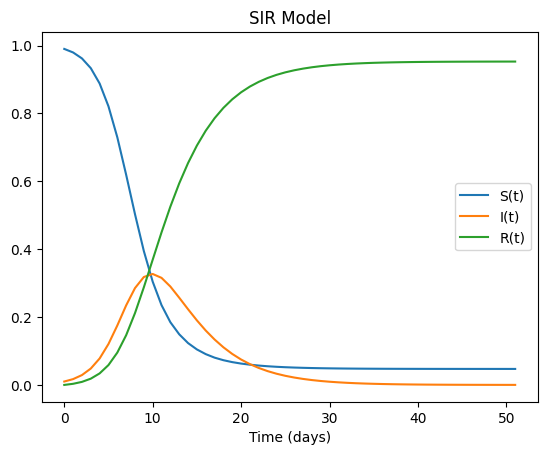

In [4]:
# When Tau = 0.8 and k = 4.
sir_plot(0.8, 4)

#### 1.2.1.b) $τ = 0.4$ and $k = 4$.

Peaks in Infected group at 24.0 days with 8.77%.
Stopping time: 95.69


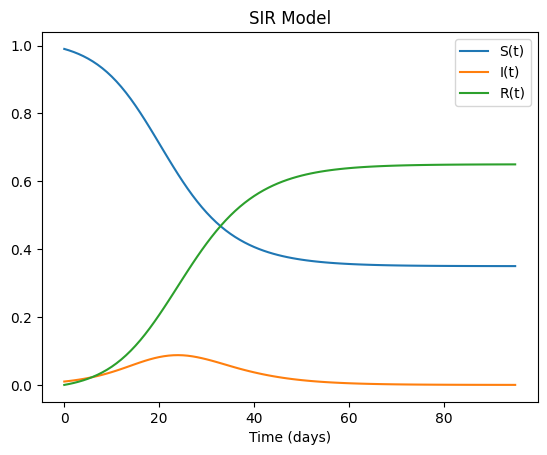

In [5]:
# When Tau = 0.4 and k = 4.
sir_plot(0.4, 4)

#### 1.2.1.c) $τ = 0.8$ and $k = 8$.

Peaks in Infected group at 10.0 days with 55.28%.
Stopping time: 81.95


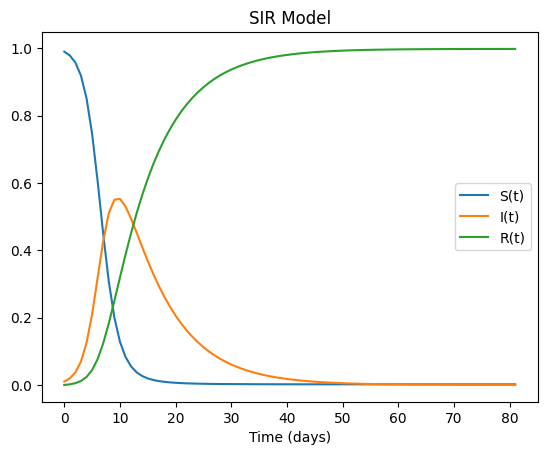

In [6]:
# When Tau = 0.8 and k = 8.
sir_plot(0.8, 8)

## 1.4. Vaccine to *susceptible* group

> Suppose there is a vaccine that can be given to susceptible people. A susceptible person who receives a vaccine can no longer become infected. However, this vaccine is very expensive, so you cannot vaccinate all susceptible people.
Modify the model to introduce a “policy” of vaccination. That is, introduce a fourth state variable, $V(t)$, that is the fraction of the population who are vaccinated at time t, such that the conservation law, $S(t) + I(t) + R(t) + V(t) = 1$, holds. 

> If you vaccinate people, $S(t)$ should decrease and $V(t)$ should increase by the same amount.

### 1.4.1. *Infected* group affected by different vaccine access rate.


In [7]:
# @param: Tau >= 0, how quickly the disease can spread
# @param: k > 0, how quickly an infected person recovers
# @param: access_rate, rate of vaccine accessibility rate
def sir_vac_plot(tau, k, v_access_rate):
    # Define the SIR model equations
    # @return: dS/dt, dI/dt, dR/dt, dV/dt
    def sir_model_with_vac(t, y):
        S, I, R, V = y
        dSdt = -tau * S * I - (S * v_access_rate)
        dIdt = tau * S * I - I/k
        dRdt = I/k
        dVdt = (S * v_access_rate)
        return [dSdt, dIdt, dRdt, dVdt]

    # Define the event function to trigger the 'Stopping Condition'
    # which is I(t) < 10^(-4), I(t) = y[1]
    def event(t, y):
        return y[1] - 10**(-4)

    event.terminal = True

    # Set initial conditions, 
    # S(0) = 0.99, I(0) = 0.01, and R(0) = 0.
    y0 = [0.99, 0.01, 0, 0]

    # Set time span for simulation
    t_span = np.linspace(0, 100, 101)

    # Run the simulation using solve_ivp and the event function
    soln = solve_ivp(fun=sir_model_with_vac, t_span=[t_span[0], t_span[-1]], y0=y0, t_eval=t_span, events=event)

    # Print the time when the 'Stopping Condition' occurs
    stopping_time = soln.t_events[0][0]
    peaks_I, _ = find_peaks(soln.y[1], height=0)
    for i in peaks_I:
        print(f"Peaks in Infected group at {soln.t[i]} days with {soln.y[1,i] * 100:.2f}%.")
    print(f"Stopping time: {stopping_time:.2f}")


    # Plot the results
    plt.plot(soln.t, soln.y[0], label='S(t)')
    plt.plot(soln.t, soln.y[1], label='I(t)')
    plt.plot(soln.t, soln.y[2], label='R(t)')
    plt.plot(soln.t, soln.y[3], label='V(t)')
    plt.xlabel('Time (days)')
    plt.title('SIR Model')
    plt.legend()
    plt.show()

> Compare with SIR Model that does not have vaccine and two groups that have different vaccine access rate.
1.   Only 10% of *Susceptible* group get access to vaccine.
2.   Only 5% of *Suseptible* group get access to vaccine.

#### 1.4.1.a) $τ = 0.8$, $k = 8$ 

Peaks in Infected group at 10.0 days with 55.28%.
Stopping time: 81.95


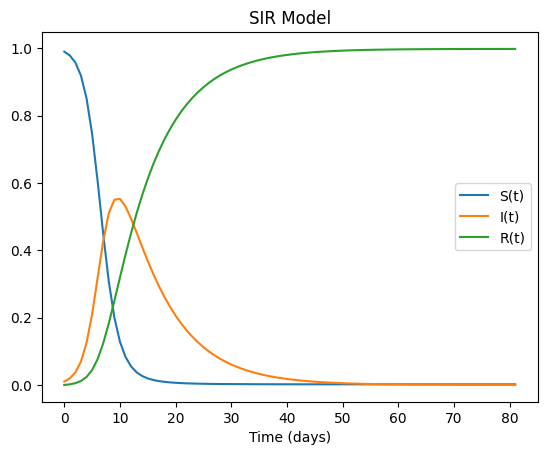

Peaks in Infected group at 10.0 days with 18.84%.
Stopping time: 75.18


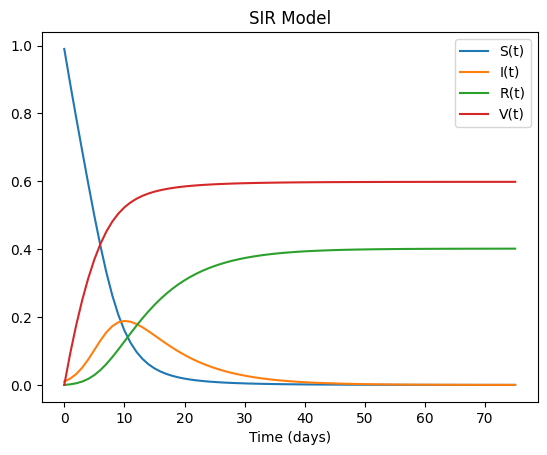

Peaks in Infected group at 10.0 days with 33.57%.
Stopping time: 79.34


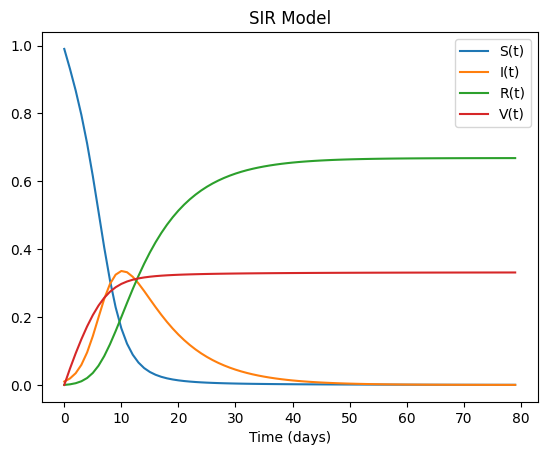

In [8]:
sir_plot(0.8, 8)
sir_vac_plot(0.8, 8, 0.1)
sir_vac_plot(0.8, 8, 0.05)

#### 1.4.1.b) $τ = 0.8$, $k = 4$

Peaks in Infected group at 10.0 days with 32.69%.
Stopping time: 51.47


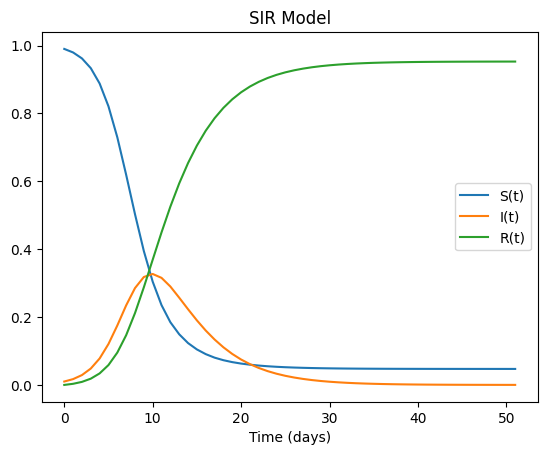

Peaks in Infected group at 8.0 days with 7.49%.
Stopping time: 42.19


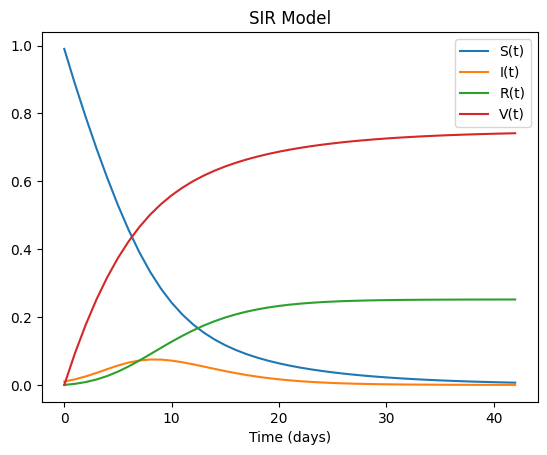

Peaks in Infected group at 10.0 days with 15.56%.
Stopping time: 47.98


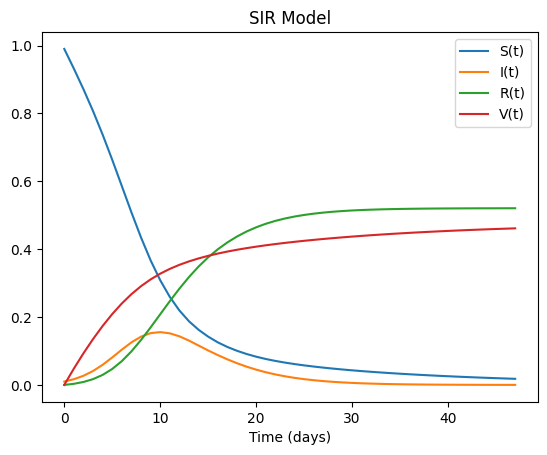

In [9]:
sir_plot(0.8, 4)
sir_vac_plot(0.8, 4, 0.1)
sir_vac_plot(0.8, 4, 0.05)

#### 1.4.1.c) $τ = 0.4$, $k = 4$

Peaks in Infected group at 24.0 days with 8.77%.
Stopping time: 95.69


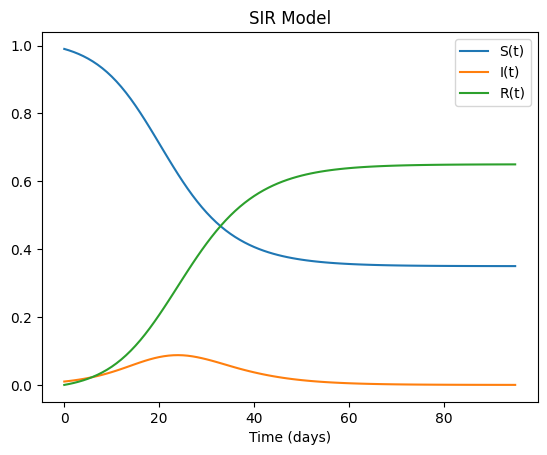

Peaks in Infected group at 4.0 days with 1.34%.
Stopping time: 33.17


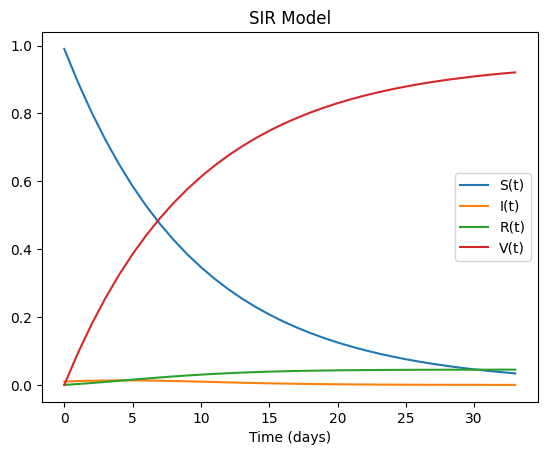

Peaks in Infected group at 8.0 days with 1.75%.
Stopping time: 44.81


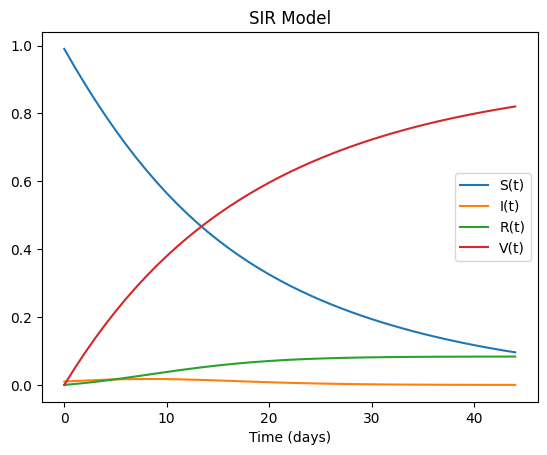

In [10]:
sir_plot(0.4, 4)
sir_vac_plot(0.4, 4, 0.1)
sir_vac_plot(0.4, 4, 0.05)

### 1.4.2. Governement supports when *Infected* group has reached to certain threshold.

In [11]:
# @param: Tau >= 0, how quickly the disease can spread
# @param: k > 0, how quickly an infected person recovers
# @param: access_rate, rate of vaccine accessibility rate
def sir_vac_plot2(tau, k, v_access_rate, gov_support, I_thresh):
    # Define the SIR model equations
    # @return: dS/dt, dI/dt, dR/dt, dV/dt
    def sir_model_with_vac(t, y):
        S, I, R, V = y
        dSdt = -tau * S * I - (S * v_access_rate)
        dIdt = tau * S * I - I/k
        dRdt = I/k
        dVdt = (S * v_access_rate)
        if I >= I_thresh:
            dSdt = -tau * S * I - (S * v_access_rate) * gov_support
            dIdt = tau * S * I - I/k
            dRdt = I/k
            dVdt = (S * v_access_rate) * gov_support
        return [dSdt, dIdt, dRdt, dVdt]

    # Define the event function to trigger the 'Stopping Condition'
    # which is I(t) < 10^(-4), I(t) = y[1]
    def event(t, y):
        return y[1] - 1e-4

    event.terminal = True
    event.direction = -1

    def eventVacc(t, y):
        return y[1] - I_thresh
    eventVacc.terminal = False

    # Set initial conditions, 
    # S(0) = 0.99, I(0) = 0.01, and R(0) = 0.
    y0 = [0.99, 0.01, 0, 0]

    # Set time span for simulation
    t_span = np.linspace(0, 100, 101)

    # Run the simulation using solve_ivp and the event function
    soln = solve_ivp(fun=sir_model_with_vac, t_span=[t_span[0], t_span[-1]], y0=y0, t_eval=t_span, events=(event, eventVacc))

    # Print the time when the 'Stopping Condition' occurs
    stopping_time = soln.t_events[0][0]
    peaks_I, _ = find_peaks(soln.y[1], height=0)
    for i in peaks_I:
        print(f"Peaks in Infected group at {soln.t[i]} days with {soln.y[1,i] * 100:.2f}%.")
    print(f"Stopping time: {stopping_time:.2f}")

    # Plot the results
    plt.plot(soln.t, soln.y[0], label='S(t)')
    plt.plot(soln.t, soln.y[1], label='I(t)')
    plt.plot(soln.t, soln.y[2], label='R(t)')
    plt.plot(soln.t, soln.y[3], label='V(t)')
    plt.xlabel('Time (days)')
    plt.title('SIR Model')
    plt.legend()
    plt.show()


> Compare the percentage of  *Infected* group depends on different number of government supports.
1.   Graph that has fixed vaccine access rate.
2.   Graph that government starts to boost vaccine access rate by **1.5** times when *Infected* group exceeds 10% of population. 
3.   Graph that government starts to boost vaccine access rate by **3** times when *Infected* group exceeds 10% of population. 



#### 1.4.2.a) $τ = 0.8$, $k = 8$ 

Peaks in Infected group at 10.0 days with 55.28%.
Stopping time: 81.95


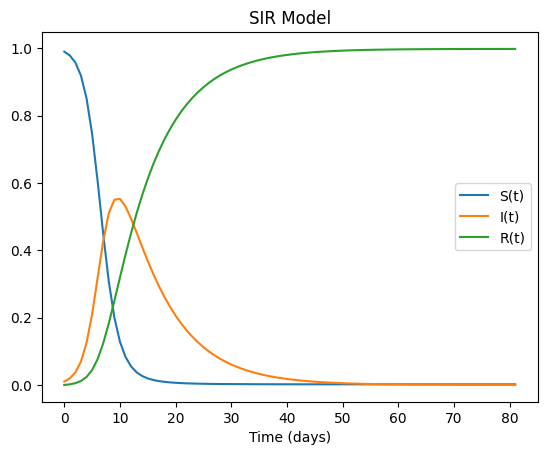

Peaks in Infected group at 10.0 days with 33.57%.
Stopping time: 79.34


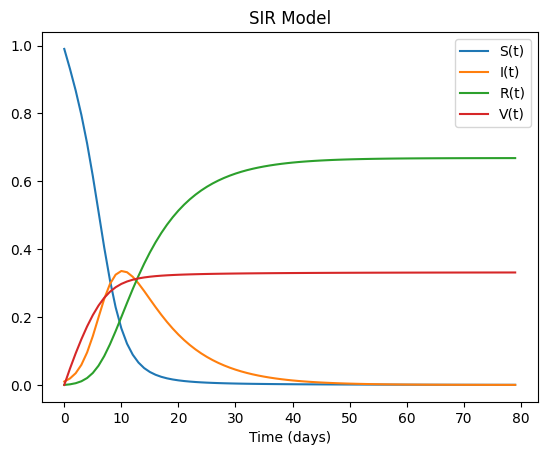

Peaks in Infected group at 10.0 days with 30.69%.
Stopping time: 78.22


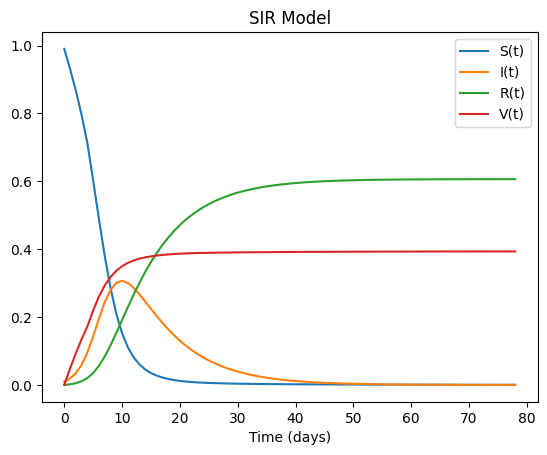

Peaks in Infected group at 9.0 days with 24.69%.
Stopping time: 75.16


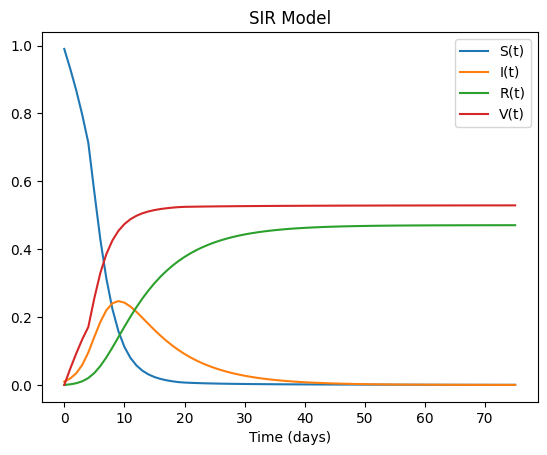

In [12]:
sir_plot(0.8, 8)
# 1. Have fixed rates of vaccine access rate
sir_vac_plot(0.8, 8, 0.05)

# 2. Government supports when Infected group 
# exceeds 10% of population 
# and boosts 1.5 times of vaccine access rate.
sir_vac_plot2(0.8, 8, 0.05, 1.5, 0.1)

# 2. Government supports when Infected group 
# exceeds 10% of population 
# and boosts 3 times of vaccine access rate.
sir_vac_plot2(0.8, 8, 0.05, 3, 0.1)

#### 1.4.2.b) $τ = 0.8$, $k = 8$ with different rate of government support and different threshold

Peaks in Infected group at 10.0 days with 55.28%.
Stopping time: 81.95


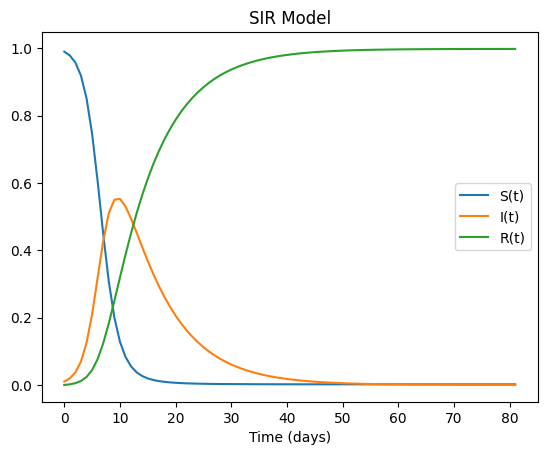

Peaks in Infected group at 10.0 days with 33.57%.
Stopping time: 79.34


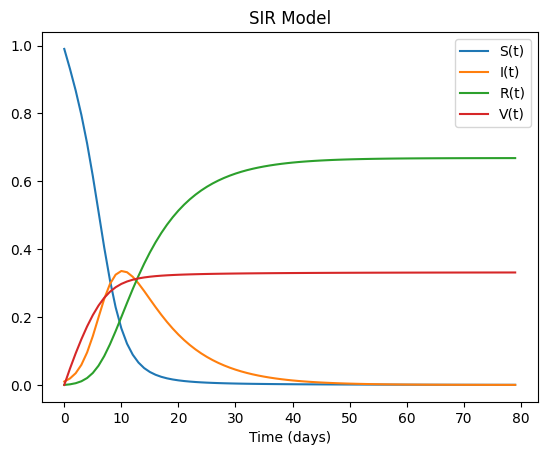

When government set threshold as 5% of population
Peaks in Infected group at 10.0 days with 29.48%.
Stopping time: 77.99


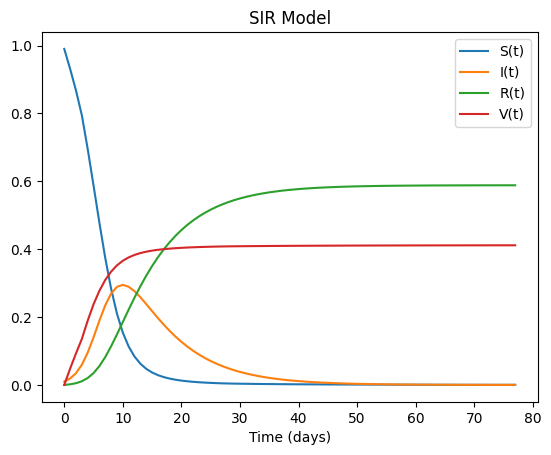

When government set threshold as 10% of population
Peaks in Infected group at 9.0 days with 24.69%.
Stopping time: 75.16


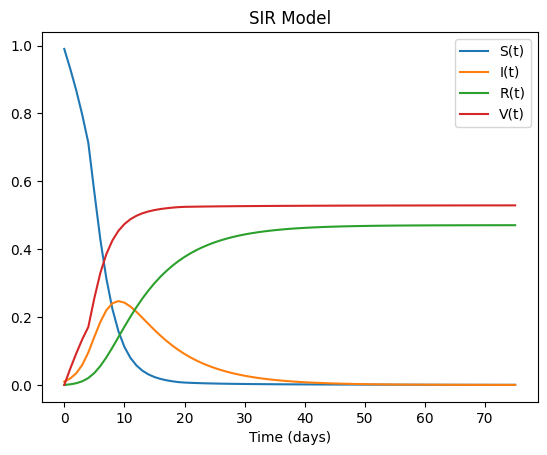

When government set threshold as 15% of population
Peaks in Infected group at 10.0 days with 32.08%.
Stopping time: 78.45


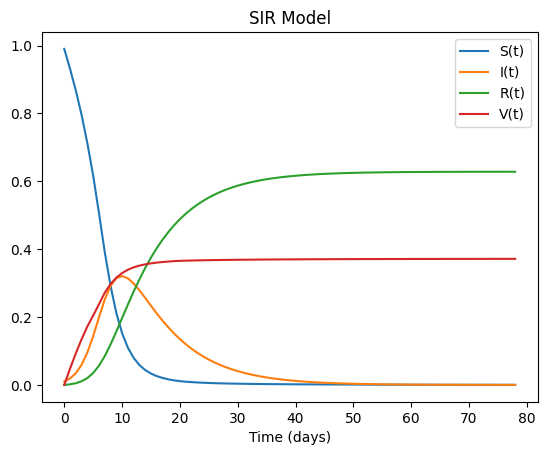

In [13]:
sir_plot(0.8, 8)
# 1. Have fixed rates of vaccine access rate
sir_vac_plot(0.8, 8, 0.05)

# 2. Government supports when Infected group 
# exceeds 10% of population 
# and boosts 1.5 times of vaccine access rate.
print(f'When government set threshold as 5% of population')
sir_vac_plot2(0.8, 8, 0.05, 1.5, 0.05)
print(f'When government set threshold as 10% of population')
sir_vac_plot2(0.8, 8, 0.05, 3, 0.1)

# 2. Government supports when Infected group 
# exceeds 10% of population 
# and boosts 3 times of vaccine access rate.
print(f'When government set threshold as 15% of population')
sir_vac_plot2(0.8, 8, 0.05, 1.5, 0.15)

### 1.4.3. Government supports different amount on three different stages.

> The government set three different stages.


1.   *I1*: When infected percentage is greater than *I1* percentage and less than *I2* percentage.
2.   *I2*: When infected percentage is greater than *I2* percentage and less than *I3* percentage.
3.   *I3*: When infected percentage is greater than *I3*.



In [15]:
# @param: Tau >= 0, how quickly the disease can spread
# @param: k > 0, how quickly an infected person recovers
# @param: access_rate, rate of vaccine accessibility rate
# 
def sir_vac_plot3(tau, k, v_access_rate, gov_support, I1, I2, I3):
    # Define the SIR model equations
    # @return: dS/dt, dI/dt, dR/dt, dV/dt
    def sir_model_with_vac(t, y):
        S, I, R, V = y
        if I1 <= I < I2:
            dVdt = (S * v_access_rate) * gov_support
        elif I2 <= I < I3:
            dVdt = (S * v_access_rate) * gov_support * 2
        elif I3 <= I:
            dVdt = (S * v_access_rate) * gov_support * 4
        else: dVdt = (S * v_access_rate)
        dSdt = -tau * S * I - dVdt
        dIdt = tau * S * I - I/k
        dRdt = I/k
        return [dSdt, dIdt, dRdt, dVdt]

    # Define the event function to trigger the 'Stopping Condition'
    # which is I(t) < 10^(-4), I(t) = y[1]
    def event(t, y):
        return y[1] - 1e-4

    event.terminal = True
    event.direction = -1

    # Set initial conditions, 
    # S(0) = 0.99, I(0) = 0.01, and R(0) = 0.
    y0 = [0.99, 0.01, 0, 0]

    # Set time span for simulation
    t_span = np.linspace(0, 100, 101)

    # Run the simulation using solve_ivp and the event function
    soln = solve_ivp(fun=sir_model_with_vac, t_span=[t_span[0], t_span[-1]], y0=y0, t_eval=t_span, events=event)

    # Print the time when the 'Stopping Condition' occurs
    stopping_time = soln.t_events[0][0]
    peaks_I, _ = find_peaks(soln.y[1], height=0)
    for i in peaks_I:
        print(f"Peaks in Infected group at {soln.t[i]} days with {soln.y[1,i] * 100:.2f}%.")
    print(f"Stopping time: {stopping_time:.2f}")

    # Plot the results
    plt.plot(soln.t, soln.y[0], label='S(t)')
    plt.plot(soln.t, soln.y[1], label='I(t)')
    plt.plot(soln.t, soln.y[2], label='R(t)')
    plt.plot(soln.t, soln.y[3], label='V(t)')
    plt.xlabel('Time (days)')
    plt.title('SIR Model')
    plt.legend()
    plt.show()

#### 1.4.3.a) $τ = 0.8$, $k = 8$ 

Peaks in Infected group at 10.0 days with 55.28%.
Stopping time: 81.95


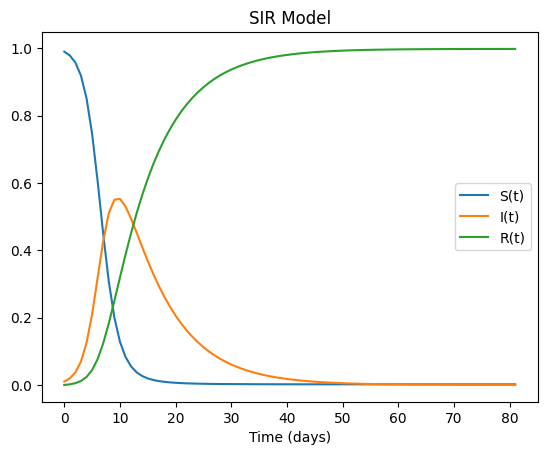

Peaks in Infected group at 10.0 days with 29.48%.
Stopping time: 77.99


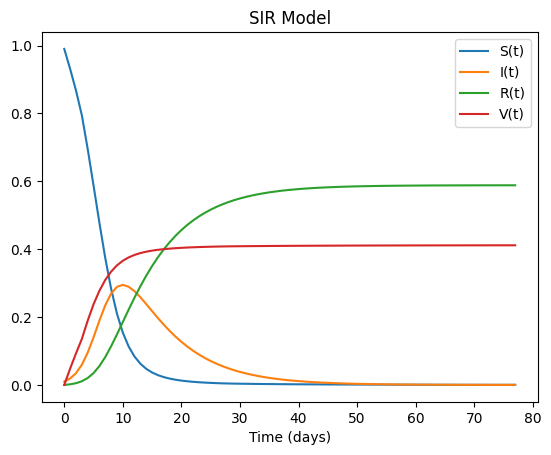

When government set threshold as 5% of population
Peaks in Infected group at 8.0 days with 19.97%.
Stopping time: 71.64


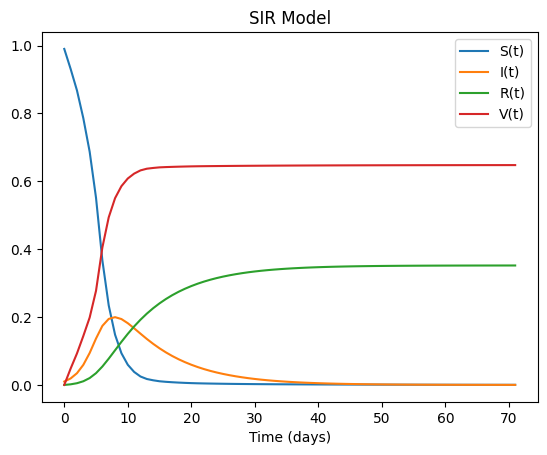

Peaks in Infected group at 10.0 days with 30.69%.
Stopping time: 78.22


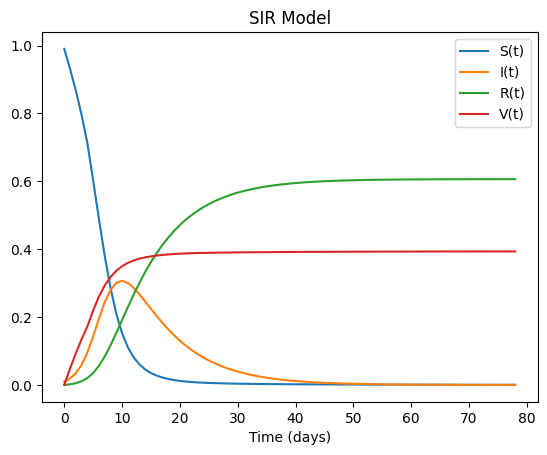

When government set threshold as 10% of population
Peaks in Infected group at 8.0 days with 24.05%.
Stopping time: 73.58


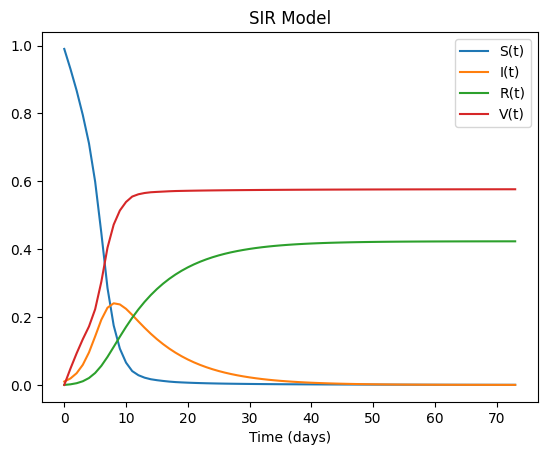

In [16]:
sir_plot(0.8, 8)
sir_vac_plot2(0.8, 8, 0.05, 1.5, 0.05)
print(f'When government set threshold as 5% of population')
sir_vac_plot3(0.8, 8, 0.05, 1.5, 0.05, 0.1, 0.15)

print('==================================================')
# 2. Government supports when Infected group 
# exceeds 10% of population 
# and boosts 3 times of vaccine access rate.
sir_vac_plot2(0.8, 8, 0.05, 1.5, 0.1)
print(f'When government set threshold as 10% of population')
sir_vac_plot3(0.8, 8, 0.05, 1.5, 0.1, 0.15, 0.2)